# EDA

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Import the datasheet

In [2]:
train=pd.read_csv('train_Titanic.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Finding the Null value

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# 4. Finding Null/NaN through Heatmap

<AxesSubplot:>

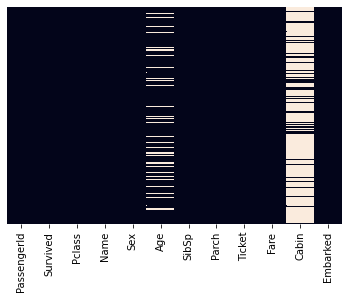

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,linecolor='white')

# 5. Finding the Count of "SURVIVED" through Countplot

<AxesSubplot:xlabel='Survived', ylabel='count'>

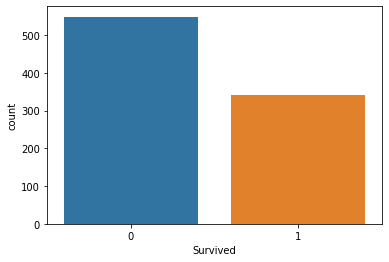

In [6]:
sns.countplot( x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

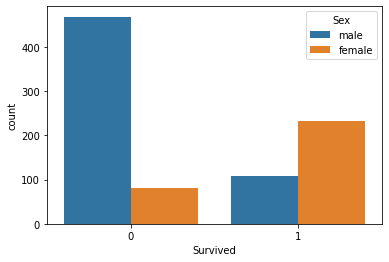

In [7]:
sns.countplot( x='Survived',data=train,hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

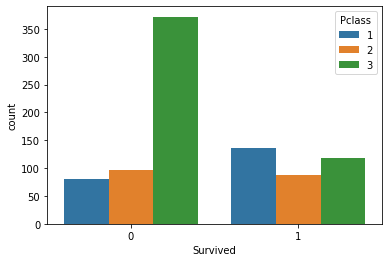

In [8]:
sns.countplot( x='Survived',data=train,hue="Pclass")

# 6. Count of people as per age group

c:\users\hp\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

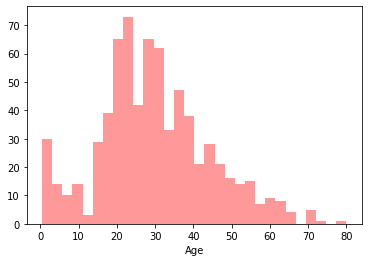

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color="r",bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

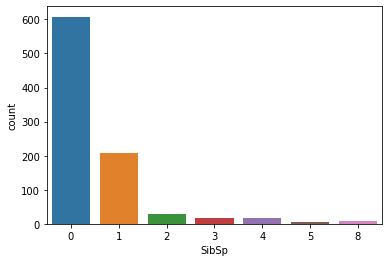

In [10]:
sns.countplot(x='SibSp',data=train)

# 7. Cleaning the Null Value

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

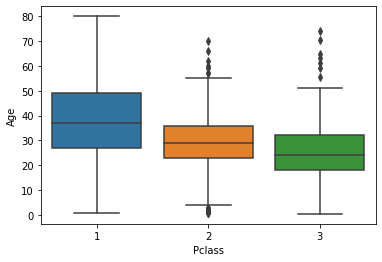

In [11]:
sns.boxplot(x='Pclass',y='Age',data=train)

# 8. Creating a Function to eliminate Null values in "Age"

In [12]:
def average_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [13]:
train['Age']=train[['Age','Pclass']].apply(average_age,axis=1)

<AxesSubplot:>

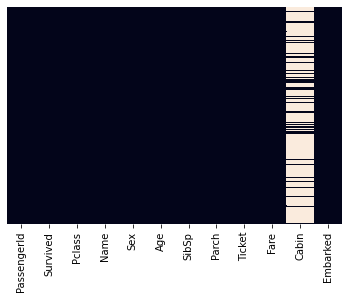

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,linecolor='white')

# 9. Eliminating "Cabin" Column 

In [15]:
train.drop("Cabin", axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.dropna(inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# 10. Converting Categorical features

In [19]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
pd.get_dummies(train['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

# 11. Dropping Columns to get clean Data

In [22]:
train.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


# 12. Concatenation of new Data "sex" and "embarked"

In [24]:
train=pd.concat([train,sex,embarked],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# 13. Building a Logistic Regression Model

# a. Train_Test_Split

As Survived is a dependent variable and all other are indpendent variable

In [26]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [27]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'],test_size=0.30,
                                                    random_state=101)

# 14. Training and Predicting

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(solver='lbfgs',
    max_iter=1000)

In [32]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [33]:
predictions=logmodel.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
accuracy=confusion_matrix(y_test,predictions)

In [36]:
accuracy

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8239700374531835